In [42]:
# create simple neural network using tensor flow using  titanic dataset

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping
# load data

dt = sns.load_dataset('titanic')

# convert categorical variables into numerical values

dt = pd.get_dummies(dt, drop_first=True)

# split data into features and target

X = dt.drop('survived', axis=1)
y = dt['survived']

# split data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create model

model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(24, activation='relu',),
     tf.keras.layers.Dense(12, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')]
)


# compile model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# early stopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# train model

history = model.fit(X_train, y_train, epochs=25, batch_size=32,validation_data=(X_test, y_test),callbacks=[early_stop])

# print loss and accuracy

loss ,accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')







Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6090 - loss: 0.7049 - val_accuracy: 0.5866 - val_loss: 0.6892
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6097 - loss: 0.6865 - val_accuracy: 0.5866 - val_loss: 0.6860
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6170 - loss: 0.6812 - val_accuracy: 0.5866 - val_loss: 0.6833
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6081 - loss: 0.6784 - val_accuracy: 0.5866 - val_loss: 0.6815
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6047 - loss: 0.6763 - val_accuracy: 0.5866 - val_loss: 0.6804
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6222 - loss: 0.6700 - val_accuracy: 0.5866 - val_loss: 0.6797
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6075 - loss: 0.6718 - val_accuracy: 0.5866 - val_loss: 0.6795
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5910 - loss: 0.6760 - val_accuracy: 0.5866 - va

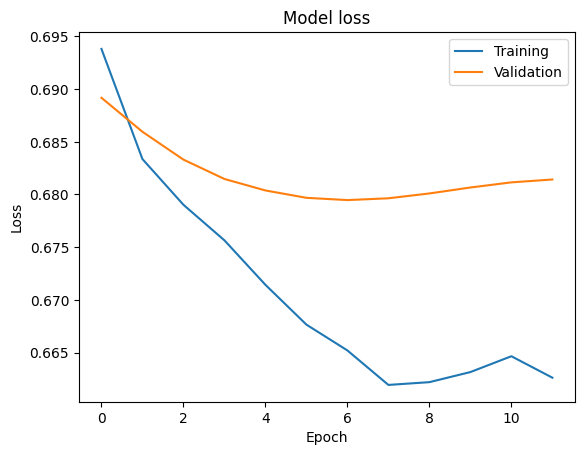

In [43]:
# plotting training and validation accuracy values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

